In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

### 1. Создадим DataFrame, посмотрим описание датасета 

In [2]:
data = load_boston() 

In [3]:
type(data) # sklearn.utils.Bunch - это like-dictionary объект 

sklearn.utils.Bunch

In [4]:
data.keys() 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2. Посмотрим на статистику датасета и корреляцию переменных

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
sns.set(rc={'figure.figsize':(14, 7)})

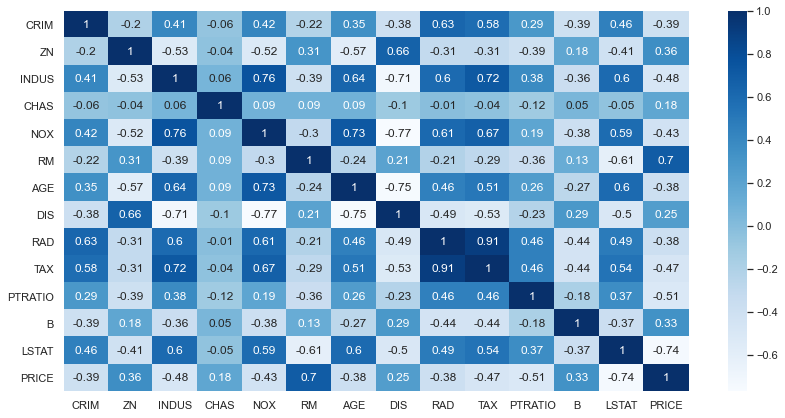

In [10]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap="Blues")
plt.show()

### 3. Построим модель и оценим ее с помощью коэффициента детерминации ($R^2$)

In [11]:
df.isnull().sum() # в описании говорится, что пустых значений нет, проверим

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
X = pd.DataFrame(np.c_[df['RM'], df['LSTAT']], columns = ['RM', 'LSTAT'])
Y = df['PRICE']

In [13]:
print(X, Y) # взглянем на содержимое объединенных переменных (X) и переменную с ценой (Y)

        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
..     ...    ...
501  6.593   9.67
502  6.120   9.08
503  6.976   5.64
504  6.794   6.48
505  6.030   7.88

[506 rows x 2 columns] 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
# разобьем данные на тренировочные(обучение модели) и тестовые(испытание или предсказание)

In [15]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

        RM  LSTAT
33   5.701  18.35
283  7.923   3.16
418  5.957  20.62
502  6.120   9.08
402  6.404  20.31
..     ...    ...
486  6.114  14.98
189  7.185   5.39
495  5.670  17.60
206  6.326  10.97
355  5.936   5.57

[404 rows x 2 columns]
        RM  LSTAT
226  8.040   3.13
292  6.630   4.70
90   6.417   8.81
373  4.906  34.77
273  7.691   6.58
..     ...    ...
349  6.939   5.89
212  5.807  16.03
156  5.272  16.14
480  6.242  10.74
248  6.433   9.52

[102 rows x 2 columns]
33     13.1
283    50.0
418     8.8
502    20.6
402    12.1
       ... 
486    19.1
189    34.9
495    23.1
206    24.4
355    20.6
Name: PRICE, Length: 404, dtype: float64
226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: PRICE, Length: 102, dtype: float64


In [16]:
model = LinearRegression() 
model.fit(X_train, Y_train) # обучаем модель

LinearRegression()

In [17]:
print(model.coef_, "- Сколько $(тысяч) прибавляет(убавляет) комнаты и \n \
% более низкого статуса населения соответственно")

[ 4.58938833 -0.71722954] - Сколько $(тысяч) прибавляет(убавляет) комнаты и 
 % более низкого статуса населения соответственно


In [18]:
print(model.intercept_, "- Базовая цена дома" )

2.7362403426065853 - Базовая цена дома


In [19]:
print(model.score(X, Y).round(3), "- Коэффициент детермиции из модели.")

y_predict = model.predict(X_train)
r2 = r2_score(Y_train, y_predict).round(3)
print(r2, "- Коэффициент детерминации из отдельно подключенного метода (sklearn.metrics).")

0.636 - Коэффициент детермиции из модели.
0.63 - Коэффициент детерминации из отдельно подключенного метода (sklearn.metrics).


In [23]:
mse = mean_squared_error(Y_train, y_predict)
print(mse.round(3))

31.777


In [ ]:
sd